# QUERY 1 : 📥 MEMUAT DAN MEMBERSIHKAN DATA

In [2]:
# Install Numpy, Matlopib, pandas dan seaborn
!pip install pandas


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install numpy


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install seaborn


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
# Query 1.1 : 🧩 Import library
# 🎯 Tujuan : Mengimpor pustaka (library) yang dibutuhkan untuk analisis data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Query 1.2 : 🧾 Memuat Dataset dari File CSV
# 🎯 Tujuan : Memuat data CO2 per kapita global dari file CSV dan melihat struktur awal
df = pd.read_csv("C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/co-emissions-per-capita.csv")
df.head()

,Entity,Code,Year,CO2_per_capita
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123


In [52]:
### Query 1.3: 🔍 Inspeksi Struktur dan Nilai Kosong
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26182 entries, 0 to 26181
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          26182 non-null  object 
 1   Code            22895 non-null  object 
 2   Year            26182 non-null  int64  
 3   CO2_per_capita  26182 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 818.3+ KB
None
Entity               0
Code              3287
Year                 0
CO2_per_capita       0
dtype: int64


In [53]:
### Query 1.4: 🛠️ Pembersihan Data
# Menghapus baris dengan nilai kosong pada CO2_per_capita dan Year
# Pastikan kolom bernama sesuai file (misal: 'Entity', 'Code', 'Year', 'CO2_per_capita')
df = df.dropna(subset=['CO2_per_capita'])

In [54]:
df['Year'] = df['Year'].astype(int)
df['CO2_per_capita'] = pd.to_numeric(df['CO2_per_capita'], errors='coerce')
df = df.dropna(subset=['CO2_per_capita'])

# QUERY 2 : 🔍 ANALISIS DAN VISUALISASI

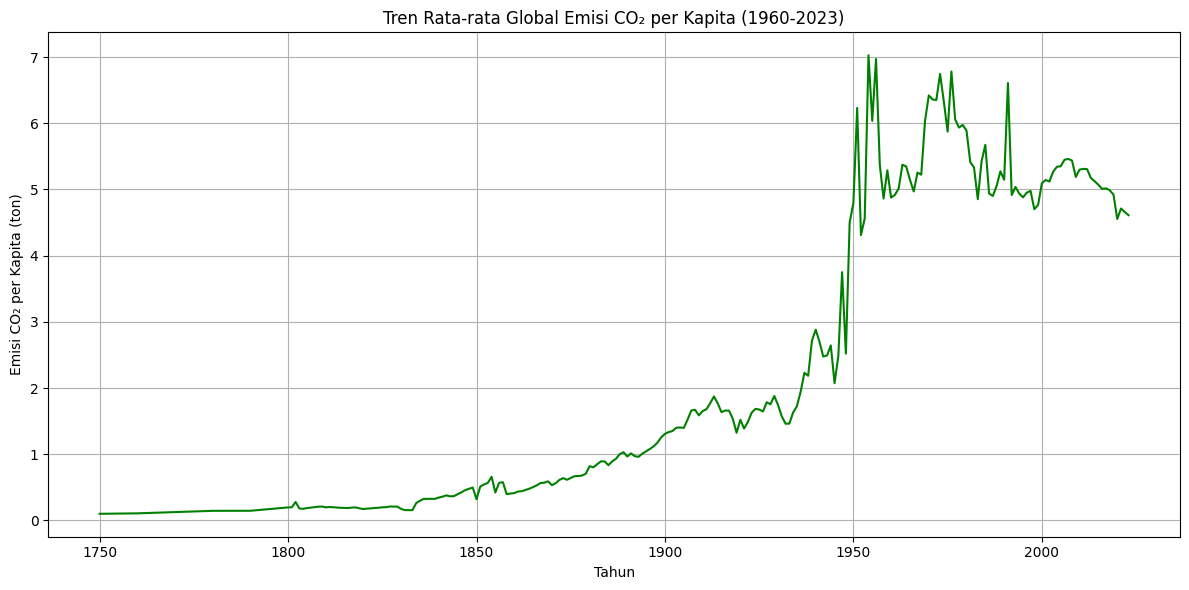

In [60]:
# Query 2.1 : 🌍 Tren Global Emisi CO2
# 🎯 Tujuan : Melihat tren rata-rata emisi global dari waktu ke waktu
global_avg = df.groupby("Year")["CO2_per_capita"].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(global_avg['Year'], global_avg['CO2_per_capita'], color='green')
plt.title("Tren Rata-rata Global Emisi CO₂ per Kapita (1960-2023)")
plt.xlabel("Tahun")
plt.ylabel("Emisi CO₂ per Kapita (ton)")
plt.grid(True)
plt.tight_layout()
plt.show()

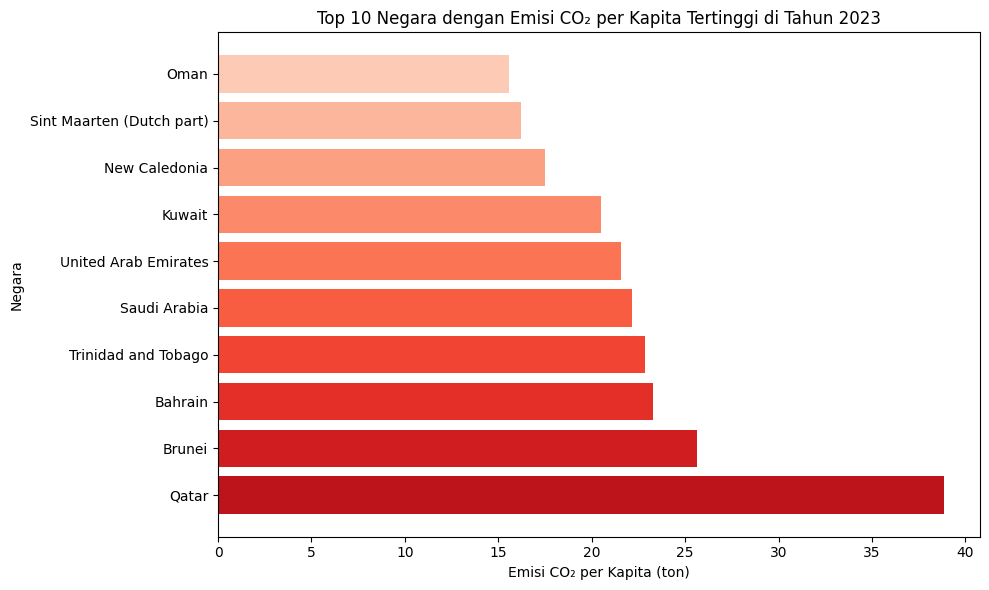

In [61]:
### Query 2.2: 🌍 Negara dengan Emisi Tertinggi (2023)
plt.figure(figsize=(10,6))
bars = plt.barh(top_10["Entity"], top_10["CO2_per_capita"], color=plt.cm.Reds_r(np.linspace(0.2, 0.8, len(top_10))))
plt.title(f"Top 10 Negara dengan Emisi CO₂ per Kapita Tertinggi di Tahun {latest_year}")
plt.xlabel("Emisi CO₂ per Kapita (ton)")
plt.ylabel("Negara")
plt.tight_layout()
plt.show()



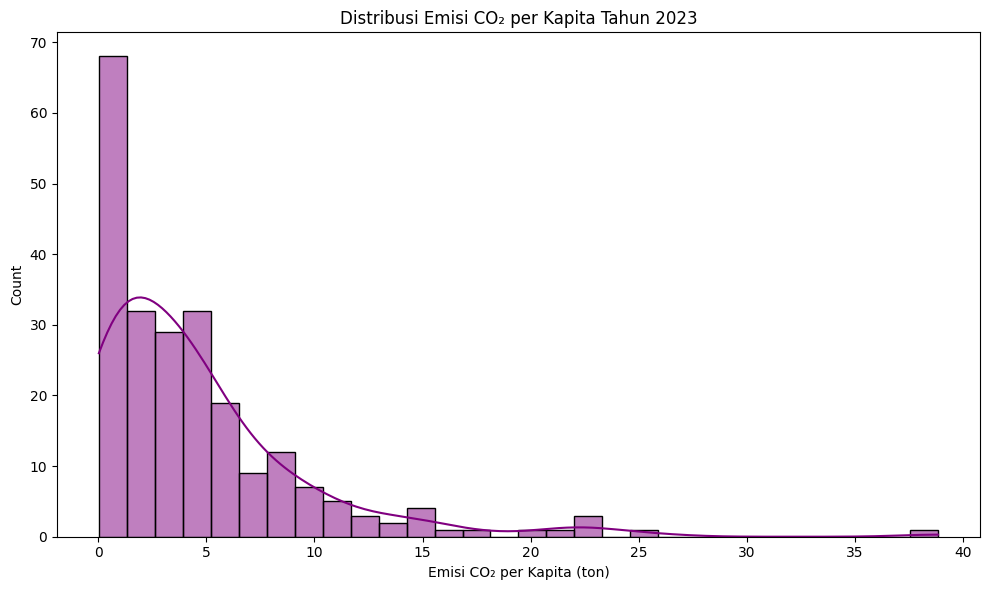

In [62]:
### Query 2.3: 🧪 Analisis Korelasi Multinegara (2023)
# Ambil data tahun terbaru
latest_df = df[df['Year'] == latest_year]
plt.figure(figsize=(10,6))
sns.histplot(latest_df['CO2_per_capita'], bins=30, kde=True, color='purple')
plt.title(f"Distribusi Emisi CO₂ per Kapita Tahun {latest_year}")
plt.xlabel("Emisi CO₂ per Kapita (ton)")
plt.tight_layout()
plt.show()

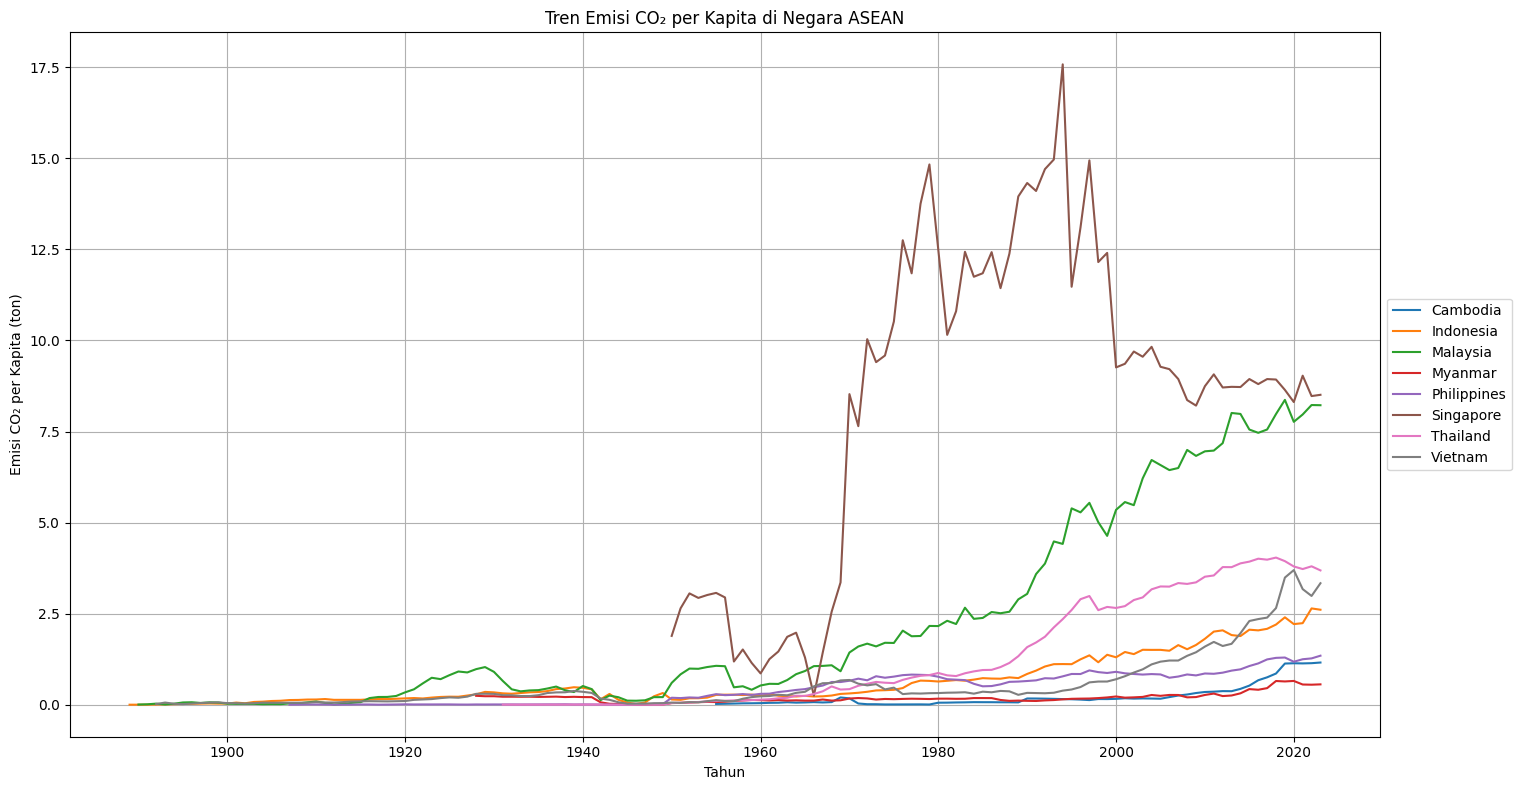

In [68]:
### Query 2.4: 🔍 Negara-negara ASEAN
asean_countries = ['Indonesia', 'Malaysia', 'Singapore', 'Thailand', 'Philippines', 'Vietnam', 'Brunei Darussalam', 'Myanmar', 'Cambodia', 'Lao']
asean_df = df[df['Entity'].isin(asean_countries)]
plt.figure(figsize=(14,8))
sns.lineplot(data=asean_df, x='Year', y='CO2_per_capita', hue='Entity')
plt.title("Tren Emisi CO₂ per Kapita di Negara ASEAN")
plt.xlabel("Tahun")
plt.ylabel("Emisi CO₂ per Kapita (ton)")
plt.grid(True)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

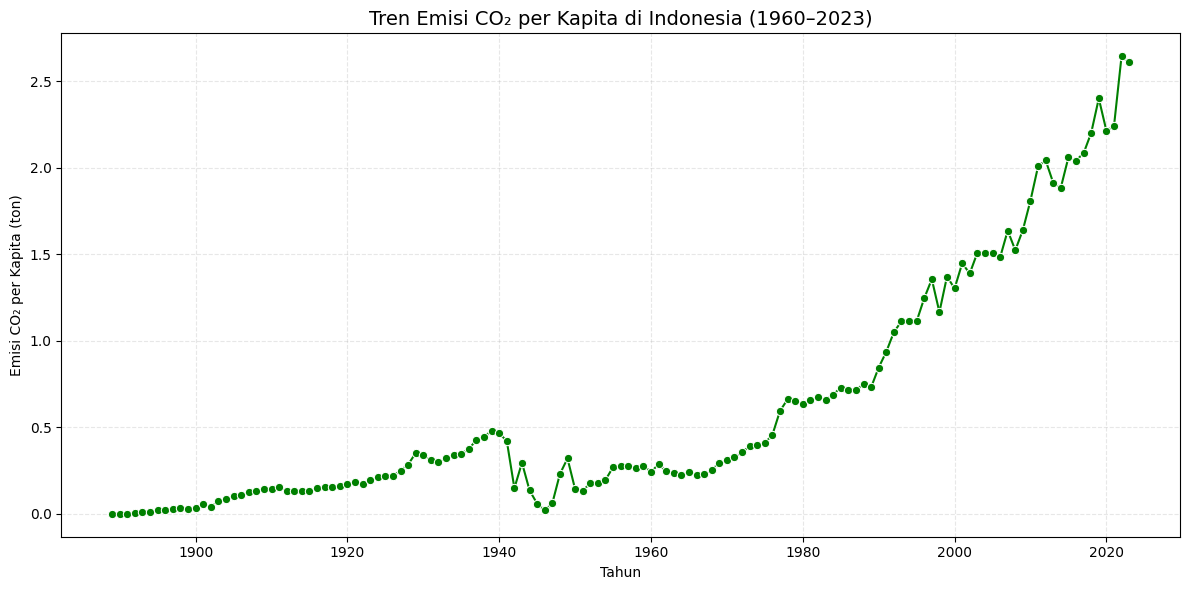

In [69]:
### Query 2.5: 🔍 Negara Indonesia 
# Filter hanya untuk Indonesia
indonesia = df[df['Entity'] == 'Indonesia']

# Plot tren emisi per kapita dari tahun ke tahun
plt.figure(figsize=(12,6))
sns.lineplot(data=indonesia, x="Year", y="CO2_per_capita", marker="o", color='green')
plt.title("Tren Emisi CO₂ per Kapita di Indonesia (1960–2023)", fontsize=14)
plt.xlabel("Tahun")
plt.ylabel("Emisi CO₂ per Kapita (ton)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## QUERY 3: 📦 Menyimpan Hasil

In [70]:
# Simpan subset data terbaru untuk visualisasi atau dashboard
latest_df.to_csv("C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/emisi_per_kapita_bersih.csv", index=False)
print("✅ Data bersih berhasil disimpan di output/emisi_per_kapita_bersih.csv")


✅ Data bersih berhasil disimpan di output/emisi_per_kapita_bersih.csv
